In [1]:
import jax
import jax.numpy as jnp
import jax.random as jrd
import matplotlib.pyplot as plt

from pastax.grid import Dataset
from pastax.simulator import LinearSSC, SmagorinskyDiffusion
from pastax.trajectory import Location
from pastax.utils import UNIT

In [2]:
jax.config.update("jax_enable_x64", True)

In [3]:
nt = 7
ny = 101
nx = 51

dt = jnp.asarray(6*60*60)

ts = jnp.arange(0, dt * (nt - 1) + 1, dt * (nt - 1) / (nt - 1))

key = jrd.key(0)
key, key_u, key_v = jrd.split(key, 3)

u = jnp.ones((nt, ny, nx)) + jrd.normal(key_u, (nt, ny, nx)) / 100
v = jnp.ones((nt, ny, nx)) + jrd.normal(key_v, (nt, ny, nx)) / 100

sim_ts = ts[1:-1]
dt0 = jnp.asarray(30*60)
cs = jnp.asarray(0.1)
n_samples = jnp.asarray(10)

In [4]:
sim_traj = LinearSSC()
sim_ens = SmagorinskyDiffusion.from_param(cs=cs)

In [5]:
flat_latitude = jnp.linspace(0, 2e6, ny)
flat_longitude = jnp.linspace(0, 1e6, nx)

flat_ds = Dataset.from_arrays(
    variables={"u": u, "v": v},
    time=ts, latitude=flat_latitude, longitude=flat_longitude,
    is_spherical_mesh=False
)
flat_x0 = Location(jnp.asarray((flat_latitude[10], flat_longitude[10])), unit=UNIT["m"])

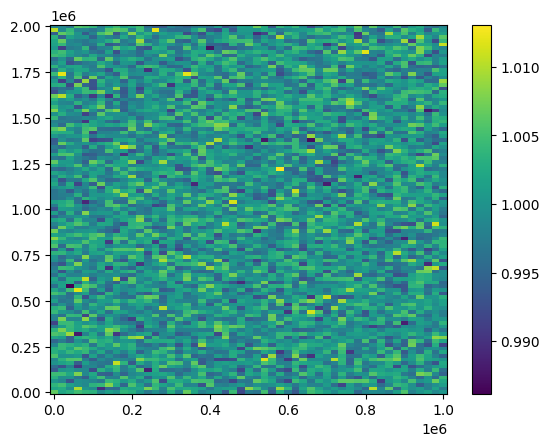

In [6]:
plt.pcolormesh(
    flat_ds.coordinates.longitude.values, flat_ds.coordinates.latitude.values, 
    flat_ds.variables["u"].values.mean(axis=0)
)
plt.colorbar()

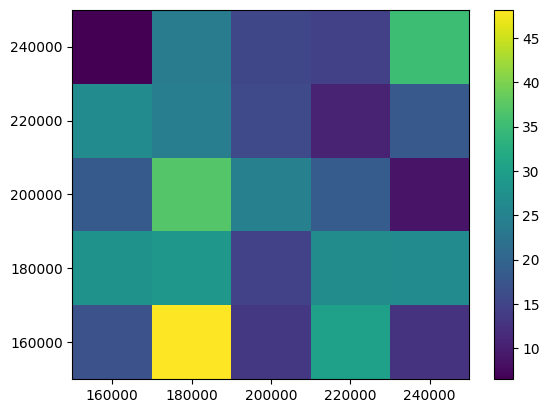

In [7]:
smag_ds = sim_ens.sde_cvf._smagorinsky_coefficients(ts[1], flat_x0.value, flat_ds)
plt.pcolormesh(
    smag_ds.coordinates.longitude.values, smag_ds.coordinates.latitude.values, 
    smag_ds.variables["smag_k"].values[0]
)
plt.colorbar()

In [8]:
flat_traj = sim_traj(flat_ds, flat_x0, sim_ts, dt0=dt0)

In [9]:
flat_traj.steps().value

Array([      0.        , 7109679.73335014, 4105243.6227728 ,
       3080280.03463469, 8061662.45112088], dtype=float64)

In [10]:
flat_traj_ens = sim_ens(flat_ds, flat_x0, sim_ts, dt0=dt0, n_samples=n_samples)

<Axes: >

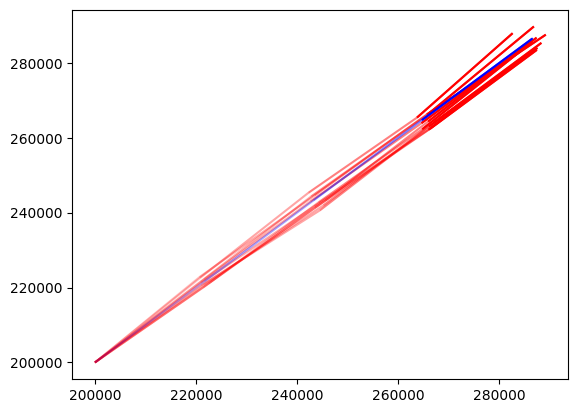

In [11]:
fig, ax = plt.subplots()

flat_traj_ens.plot(ax, label="Ensemble", color="red")
flat_traj.plot(ax, label="Trajectory", color="blue")

In [12]:
spherical_latitude = jnp.linspace(36, 38, ny)
spherical_longitude = jnp.linspace(-1, 1, nx)

spherical_ds = Dataset.from_arrays(
    variables={"u": u, "v": v},
    time=ts, latitude=spherical_latitude, longitude=spherical_longitude
)
spherical_x0 = Location(jnp.asarray((spherical_latitude[10], spherical_longitude[10])))

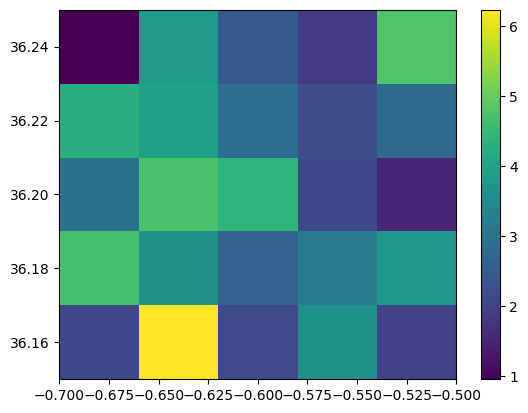

In [13]:
smag_ds = sim_ens.sde_cvf._smagorinsky_coefficients(ts[1], spherical_x0.value, spherical_ds)
plt.pcolormesh(
    smag_ds.coordinates.longitude.values, smag_ds.coordinates.latitude.values, 
    smag_ds.variables["smag_k"].values[0]
)
plt.colorbar()

In [14]:
spherical_traj = sim_traj(spherical_ds, spherical_x0, sim_ts, dt0=dt0)

In [15]:
spherical_traj.steps().value

Array([    0.        , 30589.93171435, 30625.29099965, 30558.69064461,
       30612.02796639], dtype=float64)

In [16]:
spherical_traj_ens = sim_ens(spherical_ds, spherical_x0, sim_ts, dt0=dt0, n_samples=n_samples)

<Axes: >

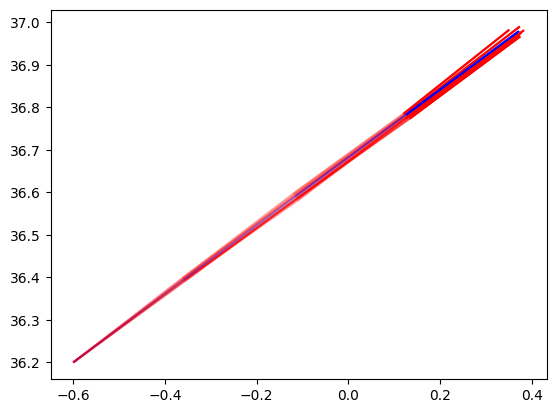

In [17]:
fig, ax = plt.subplots()

spherical_traj_ens.plot(ax, label="Ensemble", color="red")
spherical_traj.plot(ax, label="Trajectory", color="blue")

In [18]:
spherical_latitude = jnp.linspace(36, 38, ny)
spherical_longitude = jnp.linspace(-1, 1, nx)

spherical_ds = Dataset.from_arrays(
    variables={"u": u, "v": v},
    time=ts, latitude=spherical_latitude, longitude=spherical_longitude,
    use_degrees=True
)
spherical_x0 = Location(jnp.asarray((spherical_latitude[10], spherical_longitude[10])))

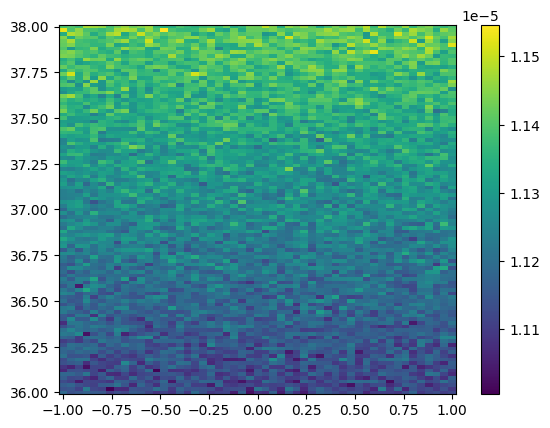

In [26]:
plt.pcolormesh(
    spherical_ds.coordinates.longitude.values, spherical_ds.coordinates.latitude.values, 
    spherical_ds.variables["u"].values.mean(axis=0)
)
plt.colorbar()

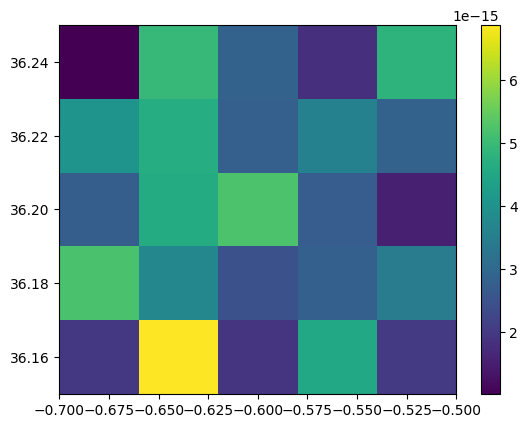

In [ ]:
smag_ds = sim_ens.sde_cvf._smagorinsky_coefficients(ts[1], spherical_x0.value, spherical_ds)
plt.pcolormesh(
    smag_ds.coordinates.longitude.values, smag_ds.coordinates.latitude.values, 
    smag_ds.variables["smag_k"].values[0]
)
plt.colorbar()

In [32]:
sim_ens = SmagorinskyDiffusion.from_param(cs=1e5)

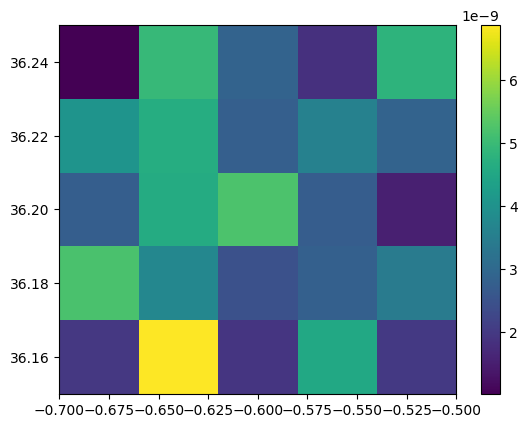

In [33]:
smag_ds = sim_ens.sde_cvf._smagorinsky_coefficients(ts[1], spherical_x0.value, spherical_ds)
plt.pcolormesh(
    smag_ds.coordinates.longitude.values, smag_ds.coordinates.latitude.values, 
    smag_ds.variables["smag_k"].values[0]
)
plt.colorbar()

In [34]:
spherical_traj = sim_traj(spherical_ds, spherical_x0, sim_ts, dt0=dt0)

In [35]:
spherical_traj_ens = sim_ens(spherical_ds, spherical_x0, sim_ts, dt0=dt0, n_samples=n_samples)

<Axes: >

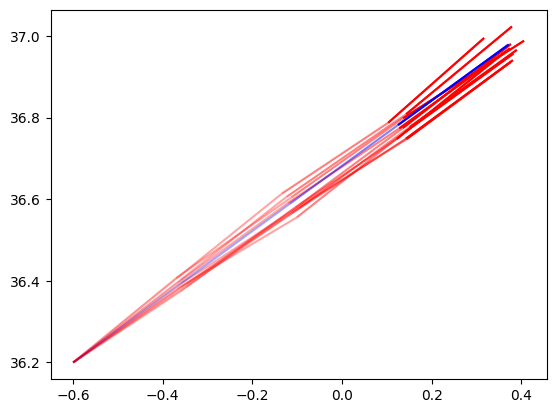

In [36]:
fig, ax = plt.subplots()

spherical_traj_ens.plot(ax, label="Ensemble", color="red")
spherical_traj.plot(ax, label="Trajectory", color="blue")